# **WORD2VEC & PMI**

Summary:


1.   Import *narco_schedule*
2.   Import Word2Vec and Train Models
3.   Relevant Terms
4.   Relevance along Temporal Dimension
5.   Correlation among Terms




---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Università/inforet_prj/')

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import pickle
import spacy
import string
import seaborn as sns; sns.set()
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [2]:
from nltk import ngrams
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string

## **1. Import narco_schedule**

In [4]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_schedule.pkl", "rb") as f:
  narco_schedule = pickle.load(f)

In [ ]:
narco_schedule = narco_schedule.loc[(narco_schedule.schedule != "0") ] #& (narco_schedule.schedule != "narco_3")

In [5]:
narco_schedule_1 = narco_schedule.loc[(narco_schedule.schedule == "narco_1") ] 

In [6]:
narco_schedule_2 = narco_schedule.loc[(narco_schedule.schedule == "narco_2") ] 

## **2. Import Word2Vec and Train Models**

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [11]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
n = 5
sequences_1 = {}
for sched, x in tqdm(zip(narco_schedule_1.schedule, narco_schedule_1.lemmatized), total=narco_schedule_1.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_1[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
n = 5
sequences_2 = {}
for sched, x in tqdm(zip(narco_schedule_2.schedule, narco_schedule_2.lemmatized), total=narco_schedule_2.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_2[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

---

In [ ]:
models_1 = {}
for schedule, sequence in sequences_1.items():
    models_1[schedule] = Word2Vec(sequences_1[schedule], min_count=10)

In [7]:
models_2 = {}
for schedule, sequence in sequences_2.items():
    models_2[schedule] = Word2Vec(sequences_2[schedule], min_count=10)

---

In [14]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_1.pkl", "wb") as f:
    pickle.dump(models_1, f)

In [8]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_2.pkl", "wb") as f:
    pickle.dump(models_2, f)

---

## **3. Relevant Terms**

In [45]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_1.pkl", "rb") as f:
  models_1 = pickle.load(f)

In [50]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_2.pkl", "rb") as f:
  models_2 = pickle.load(f)

In [14]:
#narco_schedule_1["lemmatized"].str.count("heroin")

1    2824
Name: lemmatized, dtype: int64

*   heroin 2824
*   cannabis 2359
*   marijuana 215
*   lsd 38
*   mescaline 21
*   mdma 19
*   ecstasy 17
*   mda 2



*   cocaine 11866
*   methamphetamine 958
*   amphetamine 206
*   pseudoephedrine 164
*   phencyclidine 114
*   methadone  57
*   ephedrine 57
*   demerol 38
*   opium 28
*   preludin 20
*   dilaudid 16
*   dilaudid 16
*   dexedrine 6
*   ritalin 3
*   meperidine 2
*   fentanyl 2


In [15]:
schedule_1 = ["cannabis",  "marijuana",  "lsd", "heroin", "ecstasy", "peyote", "mescaline", "mda" , 'methaqualone', "mdma", 'methaqualone' ]
schedule_2 = ["cocaine", "methamphetamine", "dilaudid", "meperidine", "demerol",  "dexedrine", "fentanyl", "ritalin", "methadone", "amphetamine", "phencyclidine", "pseudoephedrine", "ephedrine", "opium", "dilaudid", "preludin", "hydromorphone", 'oxycodone'] 

In [16]:
for genre, model in models_1.items():
    for y in schedule_1:
        if y in model.wv.vocab:
            print(genre, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:7])

narco_1 cannabis [('marijuana', 0.58), ('sativa', 0.56), ('heroin', 0.56), ('contraband', 0.56), ('substance', 0.51), ('gram', 0.51), ('drug', 0.49)]
narco_1 marijuana [('junk', 0.61), ('cannabis', 0.58), ('pot', 0.58), ('reefer', 0.58), ('dope', 0.57), ('stash', 0.54), ('cider', 0.52)]
narco_1 lsd [('twig', 0.66), ('mdma', 0.66), ('gram', 0.65), ('diacetyl', 0.63), ('barbituric', 0.63), ('controued', 0.62), ('chlordiazepoxide', 0.61)]
narco_1 heroin [('narcotic', 0.73), ('drug', 0.63), ('cannabis', 0.56), ('gram', 0.53), ('tinfoil', 0.53), ('marijuana', 0.51), ('junk', 0.51)]
narco_1 ecstasy [('mdma', 0.72), ('pill', 0.72), ('baggy', 0.65), ('cellophane', 0.63), ('sandwich', 0.62), ('baggie', 0.61), ('powdered', 0.6)]
narco_1 mescaline [('ingestion', 0.73), ('milligram', 0.68), ('optimum', 0.68), ('stream', 0.68), ('cannabinoid', 0.67), ('morphine', 0.66), ('preoccupation', 0.65)]
narco_1 mda [('vile', 0.77), ('calcium', 0.74), ('homogenous', 0.72), ('cylindrical', 0.72), ('synopsis',

In [17]:
for genre, model in models_2.items():
    for y in schedule_2:
        if y in model.wv.vocab:
            print(genre, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:7])

narco_2 cocaine [('drug', 0.72), ('narcotic', 0.69), ('powder', 0.57), ('sixteenth', 0.57), ('kilogram', 0.56), ('kilo', 0.56), ('gram', 0.55)]
narco_2 methamphetamine [('pseudoephedrine', 0.68), ('manufacturing', 0.61), ('phencyclidine', 0.6), ('meth', 0.6), ('manufacture', 0.59), ('vick', 0.57), ('ephedrine', 0.55)]
narco_2 dilaudid [('morphine', 0.84), ('sulphate', 0.81), ('sulfate', 0.81), ('secobarbital', 0.78), ('aspirin', 0.74), ('ritalin', 0.73), ('caffeine', 0.73)]
narco_2 meperidine [('ritalin', 0.75), ('ephedrine', 0.74), ('benzoyl', 0.74), ('sulphate', 0.74), ('antianxiety', 0.72), ('ccs', 0.72), ('hydrochlorate', 0.72)]
narco_2 demerol [('dilaudid', 0.71), ('aspirin', 0.64), ('analgesic', 0.61), ('morphine', 0.6), ('antidepressant', 0.6), ('sedative', 0.6), ('prescription', 0.6)]
narco_2 dexedrine [('capsule', 0.64), ('amphetamine', 0.64), ('caffeine', 0.61), ('barbiturate', 0.6), ('sulphate', 0.59), ('methedrine', 0.58), ('hydrochloride', 0.57)]
narco_2 fentanyl [('painki

In [18]:
def most_similar_list_value(model_, word, n):
    lista = []
    for genre, model in model_.items():
        if word in model.wv.vocab:
            for x in model.wv.most_similar(positive=word)[:n]:
                lista.append([x[0],round(x[1], 2)])
    return lista

In [19]:
narco_1_cannabis = most_similar_list_value(models_1, 'cannabis', 10)
narco_1_marijuana = most_similar_list_value(models_1, 'marijuana', 10)
narco_1_lsd = most_similar_list_value(models_1, 'lsd', 10)
narco_1_heroin = most_similar_list_value(models_1, 'heroin', 10)
narco_1_mdma = most_similar_list_value(models_1, 'mdma', 10)

terms_narco_1 = pd.concat([pd.DataFrame(narco_1_cannabis, columns=['cannabis', 'value']), 
                           pd.DataFrame(narco_1_marijuana, columns=['marijuana', 'value']), 
                           pd.DataFrame(narco_1_lsd, columns=['lsd', 'value']), 
                           pd.DataFrame(narco_1_heroin, columns=['heroin', 'value']), 
                           pd.DataFrame(narco_1_mdma, columns=['mdma', 'value'])],                                              
                           axis=1)
terms_narco_1

,cannabis,value,marijuana,value,lsd,value,heroin,value,mdma,value
0,marijuana,0.58,junk,0.61,twig,0.66,narcotic,0.73,pentazocine,0.76
1,sativa,0.56,cannabis,0.58,mdma,0.66,drug,0.63,diacetyl,0.73
2,heroin,0.56,pot,0.58,gram,0.65,cannabis,0.56,ecstasy,0.72
3,contraband,0.56,reefer,0.58,diacetyl,0.63,gram,0.53,baggy,0.71
4,substance,0.51,dope,0.57,barbituric,0.63,tinfoil,0.53,sampling,0.70
5,gram,0.51,stash,0.54,controued,0.62,marijuana,0.51,homogenous,0.68
6,drug,0.49,cider,0.52,chlordiazepoxide,0.61,junk,0.51,oblong,0.68
7,hashish,0.49,liquor,0.52,vile,0.60,dope,0.51,hydrochloride,0.68
8,narcotic,0.46,drug,0.51,sativa,0.59,capsule,0.50,vile,0.68
9,plant,0.45,heroin,0.51,pentazocine,0.59,powder,0.50,tablet,0.68


In [20]:
narco_2_cocaine = most_similar_list_value(models_2, 'cocaine', 10)
narco_2_methamphetamine = most_similar_list_value(models_2, 'methamphetamine', 10)
narco_2_amphetamine = most_similar_list_value(models_2, 'amphetamine', 10)
narco_2_pseudoephedrine = most_similar_list_value(models_2, 'pseudoephedrine', 10)
narco_2_phencyclidine = most_similar_list_value(models_2, 'phencyclidine', 10)

terms_narco_2 = pd.concat([pd.DataFrame(narco_2_cocaine, columns=['cocaine', 'value']), 
                           pd.DataFrame(narco_2_methamphetamine, columns=['methamphetamine', 'value']),
                           pd.DataFrame(narco_2_amphetamine, columns=['amphetamine', 'value']),
                           pd.DataFrame(narco_2_pseudoephedrine, columns=['pseudoephedrine', 'value']), 
                           pd.DataFrame(narco_2_phencyclidine, columns=['phencyclidine', 'value'])],
                          axis=1)
terms_narco_2

,cocaine,value,methamphetamine,value,amphetamine,value,pseudoephedrine,value,phencyclidine,value
0,drug,0.72,pseudoephedrine,0.68,barbiturate,0.70,ephedrine,0.74,mixture,0.72
1,narcotic,0.69,manufacturing,0.61,caffeine,0.70,capsule,0.72,acid,0.71
2,powder,0.57,phencyclidine,0.60,capsule,0.69,methamphetamine,0.68,hydrochloric,0.70
3,sixteenth,0.57,meth,0.60,pill,0.68,milligram,0.68,salt,0.70
4,kilogram,0.56,manufacture,0.59,tablet,0.67,tablet,0.66,isomer,0.68
5,kilo,0.56,vick,0.57,codeine,0.64,salt,0.66,hydrochloride,0.67
6,gram,0.55,ephedrine,0.55,dexedrine,0.64,precursor,0.65,ephedrine,0.65
7,coke,0.55,precursor,0.54,phencyclidine,0.63,sifter,0.65,opium,0.65
8,amphetamine,0.55,ingredient,0.54,dilaudid,0.61,filter,0.65,barbituric,0.65
9,methamphetamine,0.53,cocaine,0.53,milligram,0.61,barbituric,0.65,inhaler,0.64


## **4. Relevance along Temporal Dimension**

### *4.1 Time Schedule 1*

In [21]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_data.pkl", "rb") as f:
  narco_data = pickle.load(f)

In [22]:
schedule_1 = ["cannabis",  "marijuana",  "lsd", "heroin", 'methaqualone', "ecstasy", "peyote", "mescaline", "mda", "mdma"] #https://www.dea.gov/drug-information/drug-scheduling
schedule_2 = ["cocaine", "methamphetamine", "hydromorphone", "dilaudid", "meperidine", "demerol", "oxycodone", "dexedrine", "fentanyl", "ritalin", "methadone", "amphetamine", "phencyclidine", "pseudoephedrine", "ephedrine", "meth", "opium", "dilaudid", "preludin"]
schedule_3 = ["ketamine", "anabolic" , "steroids",  "testosterone", "ketamine"]
schedule_4 = ["modafinil", "provigil", "adderall", "methylphenidate", "memantine", "axura", "soma", "xanax", "darvon", "darvocet", "valium", "ativan", "talwin", "ambien", "tramadol",  "ethclorvynol"]
schedule_5 = ["phenylpropanolamine", "lomotil", "motofen", "lyrica", "parepectolin", "tetracaine"]

In [23]:
narco_data_1 = narco_data[(narco_data['lemmatized'].str.contains("|".join(schedule_1))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_3))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_2))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_4))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_5)))] 
narco_data_2 = narco_data[(narco_data['lemmatized'].str.contains("|".join(schedule_2))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_3))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_1))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_4))) & ~(narco_data['lemmatized'].str.contains("|".join(schedule_5)))] 

In [24]:
narco_1_time = narco_data_1.loc[:, ["year", "lemmatized"]]
narco_2_time = narco_data_2.loc[:, ["year", "lemmatized"]]

---

In [25]:
narco_1_time.loc[(narco_1_time["year"] >= 1950) & (narco_1_time["year"] <= 1959), 'year'] = 50 # 19
narco_1_time.loc[(narco_1_time["year"] >= 1960) & (narco_1_time["year"] <= 1969), 'year'] = 60 # 170
narco_1_time.loc[(narco_1_time["year"] >= 1970) & (narco_1_time["year"] <= 1979), 'year'] = 70 # 476
narco_1_time.loc[(narco_1_time["year"] >= 1980) & (narco_1_time["year"] <= 1989), 'year'] = 80 # 355
narco_1_time.loc[(narco_1_time["year"] >= 1990) & (narco_1_time["year"] <= 1999), 'year'] = 90 # 226
narco_1_time.loc[(narco_1_time["year"] >= 2000) & (narco_1_time["year"] <= 2009), 'year'] = 10 # 205

In [26]:
narco_1_time.loc[narco_1_time["year"] == 50, 'year'] = '50s' 
narco_1_time.loc[narco_1_time["year"] == 60, 'year'] = '60s' 
narco_1_time.loc[narco_1_time["year"] == 70, 'year'] = '70s' 
narco_1_time.loc[narco_1_time["year"] == 80, 'year'] = '80s' 
narco_1_time.loc[narco_1_time["year"] == 90, 'year'] = '90s'
narco_1_time.loc[narco_1_time["year"] == 10, 'year'] = '00s'

In [ ]:
narco_1_time.loc[narco_1_time.year == '90s'].shape

In [28]:
narco_1_time.drop(narco_1_time.loc[(narco_1_time["year"] != '50s' ) & (narco_1_time["year"] != '60s') & (narco_1_time["year"] != '70s') & (narco_1_time["year"] != '80s') & (narco_1_time["year"] != '90s') & (narco_1_time["year"] != '00s')].index, inplace=True)

In [29]:
narco_1_time = narco_1_time.groupby('year', as_index=False).agg({'lemmatized' : ' '.join})  

In [30]:
narco_1_50s = narco_1_time.loc[narco_1_time['year']=="50s"] # 2507  
narco_1_60s = narco_1_time.loc[narco_1_time['year']=="60s"] 
narco_1_70s = narco_1_time.loc[narco_1_time['year']=="70s"]
narco_1_80s = narco_1_time.loc[narco_1_time['year']=="80s"]
narco_1_90s = narco_1_time.loc[narco_1_time['year']=="90s"]
narco_1_00s = narco_1_time.loc[narco_1_time['year']=="00s"]

In [31]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_1_time.pkl", "wb") as f:
    pickle.dump(narco_1_time, f)

---

In [ ]:
n = 5
sequences_narco_1_50s = {}
for sched, x in tqdm(zip(narco_1_50s.year, narco_1_50s.lemmatized), total=narco_1_50s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_50s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_1_60s = {}
for sched, x in tqdm(zip(narco_1_60s.year, narco_1_60s.lemmatized), total=narco_1_60s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_60s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_1_70s = {}
for sched, x in tqdm(zip(narco_1_70s.year, narco_1_70s.lemmatized), total=narco_1_70s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_70s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_1_80s = {}
for sched, x in tqdm(zip(narco_1_80s.year, narco_1_80s.lemmatized), total=narco_1_80s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_80s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_1_90s = {}
for sched, x in tqdm(zip(narco_1_90s.year, narco_1_90s.lemmatized), total=narco_1_90s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_90s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_1_00s = {}
for sched, x in tqdm(zip(narco_1_00s.year, narco_1_00s.lemmatized), total=narco_1_00s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_1_00s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

---

In [38]:
models_narco_1_50s = {}
for schedule, sequence in sequences_narco_1_50s.items():
    models_narco_1_50s[schedule] = Word2Vec(sequences_narco_1_50s[schedule], min_count=10)

In [39]:
models_narco_1_60s = {}
for schedule, sequence in sequences_narco_1_60s.items():
    models_narco_1_60s[schedule] = Word2Vec(sequences_narco_1_60s[schedule], min_count=10)

In [40]:
models_narco_1_70s = {}
for schedule, sequence in sequences_narco_1_70s.items():
    models_narco_1_70s[schedule] = Word2Vec(sequences_narco_1_70s[schedule], min_count=10)

In [41]:
models_narco_1_80s = {}
for schedule, sequence in sequences_narco_1_80s.items():
    models_narco_1_80s[schedule] = Word2Vec(sequences_narco_1_80s[schedule], min_count=10)

In [42]:
models_narco_1_90s = {}
for schedule, sequence in sequences_narco_1_90s.items():
    models_narco_1_90s[schedule] = Word2Vec(sequences_narco_1_90s[schedule], min_count=10)

In [43]:
models_narco_1_00s = {}
for schedule, sequence in sequences_narco_1_00s.items():
    models_narco_1_00s[schedule] = Word2Vec(sequences_narco_1_00s[schedule], min_count=10)

---

### *4.2 Time Schedule 2*

In [44]:
narco_2_time.loc[(narco_2_time["year"] >= 1950) & (narco_2_time["year"] <= 1959), 'year'] = 50 # 25
narco_2_time.loc[(narco_2_time["year"] >= 1960) & (narco_2_time["year"] <= 1969), 'year'] = 60 # 59
narco_2_time.loc[(narco_2_time["year"] >= 1970) & (narco_2_time["year"] <= 1979), 'year'] = 70 # 192
narco_2_time.loc[(narco_2_time["year"] >= 1980) & (narco_2_time["year"] <= 1989), 'year'] = 80 # 570
narco_2_time.loc[(narco_2_time["year"] >= 1990) & (narco_2_time["year"] <= 1999), 'year'] = 90 # 1068
narco_2_time.loc[(narco_2_time["year"] >= 2000) & (narco_2_time["year"] <= 2009), 'year'] = 10 # 801

In [45]:
narco_2_time.loc[narco_2_time["year"] == 50, 'year'] = '50s' 
narco_2_time.loc[narco_2_time["year"] == 60, 'year'] = '60s' 
narco_2_time.loc[narco_2_time["year"] == 70, 'year'] = '70s' 
narco_2_time.loc[narco_2_time["year"] == 80, 'year'] = '80s' 
narco_2_time.loc[narco_2_time["year"] == 90, 'year'] = '90s'
narco_2_time.loc[narco_2_time["year"] == 10, 'year'] = '00s'

In [ ]:
narco_2_time.loc[narco_2_time.year == '00s'].shape

In [47]:
narco_2_time.drop(narco_2_time.loc[(narco_2_time["year"] != '50s' ) & (narco_2_time["year"] != '60s') & (narco_2_time["year"] != '70s') & (narco_2_time["year"] != '80s') & (narco_2_time["year"] != '90s') & (narco_2_time["year"] != '00s')].index, inplace=True)

In [48]:
narco_2_time = narco_2_time.groupby('year', as_index=False).agg({'lemmatized' : ' '.join})  

In [49]:
narco_2_50s = narco_2_time.loc[narco_2_time['year']=="50s"] #  
narco_2_60s = narco_2_time.loc[narco_2_time['year']=="60s"] 
narco_2_70s = narco_2_time.loc[narco_2_time['year']=="70s"]
narco_2_80s = narco_2_time.loc[narco_2_time['year']=="80s"]
narco_2_90s = narco_2_time.loc[narco_2_time['year']=="90s"]
narco_2_00s = narco_2_time.loc[narco_2_time['year']=="00s"]

In [50]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_2_time.pkl", "wb") as f:
    pickle.dump(narco_2_time, f)

---

In [ ]:
n = 5
sequences_narco_2_50s = {}
for sched, x in tqdm(zip(narco_2_50s.year, narco_2_50s.lemmatized), total=narco_2_50s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_50s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_2_60s = {}
for sched, x in tqdm(zip(narco_2_60s.year, narco_2_60s.lemmatized), total=narco_2_60s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_60s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_2_70s = {}
for sched, x in tqdm(zip(narco_2_70s.year, narco_2_70s.lemmatized), total=narco_2_70s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_70s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_2_80s = {}
for sched, x in tqdm(zip(narco_2_80s.year, narco_2_80s.lemmatized), total=narco_2_80s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_80s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_2_90s = {}
for sched, x in tqdm(zip(narco_2_90s.year, narco_2_90s.lemmatized), total=narco_2_90s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_90s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
sequences_narco_2_00s = {}
for sched, x in tqdm(zip(narco_2_00s.year, narco_2_00s.lemmatized), total=narco_2_00s.shape[0]):
    penta_gram = ngrams(x.split(), n)

    sequences_narco_2_00s[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

---

In [57]:
models_narco_2_50s = {}
for schedule, sequence in sequences_narco_2_50s.items():
    models_narco_2_50s[schedule] = Word2Vec(sequences_narco_2_50s[schedule], min_count=10)

In [58]:
models_narco_2_60s = {}
for schedule, sequence in sequences_narco_2_60s.items():
    models_narco_2_60s[schedule] = Word2Vec(sequences_narco_2_60s[schedule], min_count=10)

In [59]:
models_narco_2_70s = {}
for schedule, sequence in sequences_narco_2_70s.items():
    models_narco_2_70s[schedule] = Word2Vec(sequences_narco_2_70s[schedule], min_count=10)

In [60]:
models_narco_2_80s = {}
for schedule, sequence in sequences_narco_2_80s.items():
    models_narco_2_80s[schedule] = Word2Vec(sequences_narco_2_80s[schedule], min_count=10)

In [61]:
models_narco_2_90s = {}
for schedule, sequence in sequences_narco_2_90s.items():
    models_narco_2_90s[schedule] = Word2Vec(sequences_narco_2_90s[schedule], min_count=10)

In [62]:
models_narco_2_00s = {}
for schedule, sequence in sequences_narco_2_00s.items():
    models_narco_2_00s[schedule] = Word2Vec(sequences_narco_2_00s[schedule], min_count=10)

---

### *4.3 Similarity betweeen words along temporal dimesion*

In [63]:
list_models_time_schedule_1 = [models_narco_1_50s, models_narco_1_60s, models_narco_1_70s, models_narco_1_80s, models_narco_1_90s, models_narco_1_00s]
list_models_time_schedule_2 = [models_narco_2_50s, models_narco_2_60s, models_narco_2_70s, models_narco_2_80s, models_narco_2_90s, models_narco_2_00s]

In [64]:
def similarity_2_terms(word1, word2, list_models_schedule):
    print('(' , word1 , '-' , word2, ')')
    for x in list_models_schedule:
        try:
            for genre, model in x.items():
                print(genre, round(model.wv.similarity( word1, word2 ), 3) )
        except:
            pass

In [65]:
similarity_2_terms('drug', 'cannabis', list_models_time_schedule_1)

( drug - cannabis )
50s 0.993
60s 0.576
70s 0.32
80s 0.283
90s 0.409
00s 0.613


---

## **5. Correlation among Terms**

In [30]:
narco_1_pmi = pd.read_csv("/content/drive/MyDrive/Università/inforet_prj/narco_1_pmi_nlp.csv", sep="|" , names = ['sent_clean'], header=None)

In [31]:
narco_1_pmi = narco_1_pmi.loc[(narco_1_pmi.sent_clean == '')|(~pd.isna(narco_1_pmi.sent_clean))]

### *5.1 Single Terms co-occurrence Matrix*

In [32]:
vect_1_pmi = CountVectorizer(min_df=0.01)
X_1_pmi = vect_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [33]:
df_1_pmi = pd.DataFrame(X_1_pmi.todense(), columns=vect_1_pmi.vocabulary_)

In [34]:
df_1_pmi_asint = df_1_pmi.astype(int)
coocc_1_pmi = df_1_pmi_asint.T.dot(df_1_pmi_asint)

In [35]:
coocc_1_pmi

,appeal,order,petition,contend,convict,follow,jury,trial,unlawful,defendant,proceeding,sentence,probation,second,allege,charge,possession,receive,present,motion,arrest,suppress,evidence,cross,prosecution,witness,fail,testimony,apartment,find,argument,request,year,statute,time,conduct,drug,report,use,hearing,...,observe,act,control,doubt,rule,prove,term,determine,require,grant,warrant,concern,section,offense,record,sufficient,discretion,car,leave,note,case,involve,indicate,probable,murder,factor,vehicle,finding,conclude,apply,go,plaintiff,public,child,death,instruction,impose,narcotic,ground,respondent
appeal,4260,83,74,11,42,154,55,14,104,43,55,181,82,95,140,40,116,54,212,74,122,26,63,67,424,360,160,153,81,30,378,50,92,345,108,46,133,65,128,355,...,192,23,21,44,31,60,135,158,80,55,260,22,211,65,46,81,275,104,168,55,40,95,108,29,64,38,57,27,100,149,321,430,97,83,58,214,108,99,67,154
order,83,2502,20,23,44,87,38,6,72,32,64,108,44,16,74,15,39,63,66,47,60,14,23,46,364,56,71,112,178,12,38,44,67,121,60,26,58,37,18,50,...,104,12,21,41,60,16,80,38,68,51,135,9,25,13,33,47,213,55,95,43,3,37,61,20,124,4,40,33,38,64,134,303,24,30,51,45,68,49,25,38
petition,74,20,3438,8,30,68,50,108,131,33,22,144,83,32,171,79,56,26,45,41,59,34,73,19,58,135,47,52,74,24,74,62,54,40,85,64,169,34,50,230,...,103,32,39,37,61,71,75,136,116,30,63,65,65,19,33,57,191,544,27,22,70,48,49,58,94,162,27,73,250,508,240,842,32,68,35,114,58,67,206,106
contend,11,23,8,2871,19,4,13,4,143,13,7,11,18,64,17,4,25,10,17,27,7,1,5,13,123,42,14,22,22,1,8,9,21,14,12,6,8,18,15,532,...,12,1,205,26,11,52,15,10,30,4,19,1,352,48,58,12,201,25,19,9,13,11,21,73,13,3,29,2,5,25,29,481,22,10,4,3,12,13,11,53
convict,42,44,30,19,2368,31,26,14,59,32,36,48,66,23,74,54,50,46,44,40,33,18,44,36,77,106,61,55,53,25,33,38,31,62,51,34,25,25,13,84,...,52,34,24,34,40,32,49,103,73,42,103,17,141,55,43,33,138,143,39,25,42,35,40,30,33,49,58,35,120,122,134,395,17,40,20,28,28,44,60,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
instruction,214,45,114,3,28,76,41,189,45,38,21,147,92,99,72,74,108,28,68,41,78,36,206,35,136,111,59,61,82,60,115,56,50,160,110,23,83,15,37,104,...,78,46,15,32,20,182,32,111,40,54,66,156,120,70,32,95,228,256,36,56,9,38,85,14,101,206,42,11,387,403,235,407,13,82,55,4555,7,25,154,156
impose,108,68,58,12,28,188,18,5,96,19,41,94,48,20,231,28,31,19,77,38,51,16,88,42,89,323,21,50,56,11,126,21,46,82,52,80,102,79,121,134,...,95,23,18,26,187,25,140,66,197,46,522,18,138,33,77,32,116,88,169,197,126,27,26,94,43,25,79,22,49,66,117,335,124,93,196,7,2550,82,47,81
narcotic,99,49,67,13,44,109,58,334,181,115,92,172,87,11,1105,40,62,21,236,157,235,36,82,124,660,137,21,338,75,43,173,52,131,151,93,140,175,66,13,86,...,119,81,31,87,68,18,116,126,3300,70,99,43,57,11,93,119,348,121,62,126,69,271,271,383,94,66,42,82,178,121,295,570,81,89,128,25,82,5692,65,33
ground,67,25,206,11,60,151,235,104,164,104,32,256,246,30,213,237,134,160,115,82,192,418,100,88,100,245,63,178,153,74,81,185,75,117,222,72,215,42,73,356,...,122,50,62,153,77,72,172,259,87,77,42,194,96,33,59,144,438,757,29,26,71,143,169,125,92,209,23,75,1217,2066,540,1957,22,168,25,154,47,65,8173,134


In [13]:
coocc_1_pmi.max().median()

3642.0

In [14]:
def get_co_pmi_value(word1, word2, matrix):
    return matrix.loc[matrix.index == word1, [word2]]

In [26]:
get_co_pmi_value('follow', 'order', coocc_1_pmi)

,order
follow,87


In [27]:
maxValue = np.amax(coocc_1_pmi['follow'])
maxValue

2938

In [17]:
def pmi(df, positive=True):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df_pmi = df / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        df_pmi = np.log(df_pmi)
    df_pmi[np.isinf(df_pmi)] = 0.0  # log(0) = 0
    if positive:
        df_pmi[df_pmi < 0] = 0.0
    return df_pmi

In [18]:
pmi_matrix_1_pmi = pmi(coocc_1_pmi, positive=True)
pmi_matrix_1_pmi

,appeal,order,petition,contend,convict,follow,jury,trial,unlawful,defendant,proceeding,sentence,probation,second,allege,charge,possession,receive,present,motion,arrest,suppress,evidence,cross,prosecution,witness,fail,testimony,apartment,find,argument,request,year,statute,time,conduct,drug,report,use,hearing,...,observe,act,control,doubt,rule,prove,term,determine,require,grant,warrant,concern,section,offense,record,sufficient,discretion,car,leave,note,case,involve,indicate,probable,murder,factor,vehicle,finding,conclude,apply,go,plaintiff,public,child,death,instruction,impose,narcotic,ground,respondent
appeal,3.475477,0.187068,0.000000,0.000000,0.000000,0.415396,0.000000,0.000000,0.000000,0.000000,0.000000,0.043457,0.000000,0.042256,0.000000,0.000000,0.218434,0.000000,0.633400,0.000000,0.000000,0.000000,0.000000,0.000000,0.677780,0.347190,0.176859,0.132873,0.000000,0.000000,1.206679,0.000000,0.000000,0.902528,0.0,0.00000,0.000000,0.000000,0.392167,0.227976,...,0.496829,0.000000,0.000000,0.0,0.000000,0.000000,0.161161,0.062740,0.000000,0.000000,0.471278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.535240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078862,0.000000,0.098895,0.000000,0.000000,0.716657,0.250232,0.000000,0.000000,0.000000
order,0.187068,4.242849,0.000000,0.000000,0.289151,0.494127,0.000000,0.000000,0.000000,0.000000,0.722324,0.176867,0.000000,0.000000,0.000000,0.000000,0.000000,0.270761,0.116243,0.088044,0.000000,0.000000,0.000000,0.120020,1.174976,0.000000,0.014141,0.470709,1.076668,0.000000,0.000000,0.034589,0.328182,0.504550,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.533500,0.000000,0.000000,0.0,0.350869,0.000000,0.287688,0.000000,0.000000,0.329400,0.465646,0.000000,0.000000,0.000000,0.000000,0.033060,0.334094,0.000000,0.614928,0.000000,0.000000,0.000000,0.000000,0.000000,1.103915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.437384,0.000000,0.000000,0.000000
petition,0.000000,0.000000,3.644595,0.000000,0.000000,0.000000,0.000000,0.310429,0.000000,0.000000,0.000000,0.006522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.389751,0.000000,0.000000,0.000000,...,0.065812,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.104548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.043785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368902,0.396123,0.000000,0.149717,0.004864,0.694811,0.000000,0.013967,0.000000,0.000000,0.000000,0.278628,0.000000,0.000000,0.079289,0.000000
contend,0.000000,0.000000,0.000000,4.943375,0.000000,0.000000,0.000000,0.000000,0.484008,0.000000,0.000000,0.000000,0.000000,0.578516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,1.563755,...,0.000000,0.000000,1.984427,0.0,0.000000,0.256505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.959321,0.295531,0.723265,0.000000,0.557585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
convict,0.000000,0.289151,0.000000,0.000000,4.361721,0.000000,0.000000,0.000000,0.000000,0.036481,0.233918,0.000000,0.005598,0.000000,0.000000,0.000000,0.113601,0.043226,0.000000,0.013734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005051,0.000000,0.0,0.032362,0.000000,0.000000,0.371607,0.000000,0.222202,0.282059,0.000000,0.000000,0.237143,0.229502,0.000000,0.00

In [25]:
get_co_pmi_value('follow', 'order', pmi_matrix_1_pmi)

,order
follow,0.494127


### *5.2 Bi-grams co-occurrences Matrix*

In [36]:
vect_bigr_1_pmi = CountVectorizer(min_df=100, ngram_range=(2,2))
X_bigr_1_pmi = vect_bigr_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [37]:
X_bigr_1_pmi

<180692x979 sparse matrix of type '<class 'numpy.int64'>'
	with 225992 stored elements in Compressed Sparse Row format>

In [38]:
df_1_pmi_bigr = pd.DataFrame(X_bigr_1_pmi.todense(), columns=vect_bigr_1_pmi.vocabulary_)

In [39]:
df_1_pmi_bigr_asint = df_1_pmi_bigr.astype(int)
coocc_bigr_1_pmi = df_1_pmi_bigr_asint.T.dot(df_1_pmi_bigr_asint)

In [40]:
pmi_1_pmi_bigr_matrix = pmi(coocc_bigr_1_pmi, positive=True)
pmi_1_pmi_bigr_matrix

,appeal order,postconviction petition,jury trial,intent deliver,represent defendant,sentence defendant,petition revoke,defendant probation,revoke probation,allege defendant,defendant charge,charge unlawful,unlawful possession,petition allege,ineffective assistance,present defendant,defendant motion,motion quash,quash arrest,arrest suppress,suppress evidence,cross examine,prosecution witness,present evidence,defendant testimony,closing argument,notice appeal,defendant request,time defendant,defendant trial,defendant petition,dismiss petition,hold defendant,time trial,argument defendant,defendant know,defendant claim,effective assistance,claim ineffective,defendant attorney,...,improbable unsatisfactory,conviction possession,time serve,credit time,time spend,hearing officer,impose defendant,possession heroin,state judgment,sentence term,charge information,unlawful delivery,finding fact,floor apartment,crime evidence,year penitentiary,follow day,post arrest,concurrent sentence,unlawful sale,sale narcotic,narcotic drug,sentence penitentiary,possession narcotic,tinfoil package,offense possession,amend petition,affirmative defense,course conduct,voluntary manslaughter,penitentiary term,brutal heinous,impose trial,attempt armed,dollar bill,glove compartment,complain witness,count indictment,minimum sentence,marital property
appeal order,6.409589,3.921089,0.00000,0.000000,0.000000,0.0,0.991263,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.647514,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.813524,0.000000
postconviction petition,3.921089,3.832626,0.00000,0.000000,0.000000,0.0,0.466218,0.07309,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.438146,0.0,0.0,0.0,0.593712,1.017762,0.0,0.0,0.0,0.0,0.000000,1.12144,0.00000,0.000000,0.024357,0.0,0.0,0.000000,0.0,0.934024,0.000000,0.000000,...,0.000000,0.000000,0.122469,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.798261,0.231258,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.016313,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.373996,0.000000,0.000000,0.000000,0.000000,1.076258,0.645154,0.000000
jury trial,0.000000,0.000000,6.95689,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.405624,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.030842,0.000000,1.195597,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.236610,0.0,0.0,0.000000,0.000000,1.216479,0.000000,0.0,0.0,0.0,0.0,1.628413,0.000000,0.000000,0.465262,0.000000,1.636410,0.000000,0.000000,0.000000,0.000000
intent deliver,0.000000,0.000000,0.00000,6.319409,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.016704,1.343222,0.000000,0.000000,0.0,0.0,0.0,1.679289,0.000000,0.0,0.0,0.0,0.0,2.328108,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.916394,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.527164,0.000000,0.0,0.000000,1.629555,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045781,0.000000,0.000000,0.000000,0.418867,0.000000,0.000000
represent defendant,0.000000,0.000000,0.00000,0.000000,6.831543,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0

In [41]:
get_co_pmi_value('postconviction petition', 'appeal order', pmi_1_pmi_bigr_matrix)

,appeal order
postconviction petition,3.921089


PMI with Opinions

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_sch.pkl", "rb") as f:
    narco_sch = pickle.load(f)

In [ ]:
narco_sch = narco_sch.loc[narco_sch.schedule == "narco_1"]

In [ ]:
narco_sch

,schedule,lemmatized
8,narco_1,appeal order dismiss untimely postconviction p...
17,narco_1,believe confession good soul good thing eviden...
20,narco_1,stipulate bench trial defendant convict posses...
27,narco_1,appeal conviction stipulated bench trial offen...
41,narco_1,defendant charge indictment offense cannabis t...
...,...,...
6037,narco_1,go send exhibit jury room want specifically in...
6038,narco_1,majority commit grave error hold trial effect ...
6047,narco_1,try jury return verdict guilty murder voluntar...
6049,narco_1,petition review recent recommendation response...


In [ ]:
vect_op = CountVectorizer()
X_op = vect_op.fit_transform(narco_sch.lemmatized)

In [ ]:
X_op

<1421x14680 sparse matrix of type '<class 'numpy.int64'>'
	with 492319 stored elements in Compressed Sparse Row format>

In [ ]:
X_coocc = X_op.transpose().dot(X_op)

In [ ]:
X_coocc

<14680x14680 sparse matrix of type '<class 'numpy.longlong'>'
	with 31454602 stored elements in Compressed Sparse Column format>

In [ ]:
pmi_op_matrix = pmi(X_coocc, positive=True)

In [ ]:
pmi_op = pd.DataFrame(pmi_op_matrix, columns=vect_op.vocabulary_, index=vect_op.vocabulary_)

In [ ]:
get_co_pmi_value('cannabis', 'sativa', pmi_op)

,sativa
cannabis,0.268465


### *5.3 Plot Correlation*

In [46]:
## SCHEDULE 1
words = ["cannabis",  "marijuana",  "heroin", "mdma", "lsd", "drug", "narcotic", "crime"]
similarities = np.zeros((len(words), len(words)), dtype=np.float_)
for idx1, word1 in enumerate(words):
    for idx2, word2 in enumerate(words):
        # note KeyError is possible if word doesn't exist
        sim = models_1['narco_1'].wv.similarity(word1, word2)
        similarities[idx1, idx2] = sim
        
df = pd.DataFrame.from_records(similarities, columns=words)
df.index = words

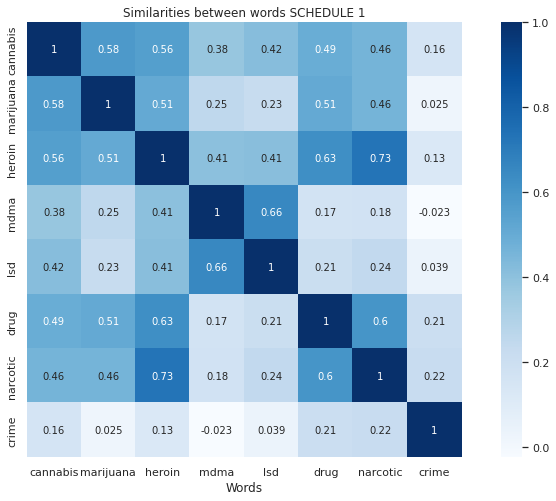

In [47]:
f, ax=plt.subplots(1, 1, figsize=(14,8))
cmap = plt.cm.Blues
#mask = np.zeros_like(df)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, cmap=cmap, square=True,annot=True, ax=ax)
#_=plt.yticks(rotation=90)
plt.xlabel('Words')
#_=plt.xticks(rotation=45)
_=plt.title("Similarities between words SCHEDULE 1")

---

In [53]:
## SCHEDULE 2
words = ["cocaine", "methamphetamine", "amphetamine",  "pseudoephedrine", "phencyclidine", "drug", "narcotic", "crime"]
similarities = np.zeros((len(words), len(words)), dtype=np.float_)
for idx1, word1 in enumerate(words):
    for idx2, word2 in enumerate(words):
        # note KeyError is possible if word doesn't exist
        sim = models_2['narco_2'].wv.similarity(word1, word2)
        similarities[idx1, idx2] = sim
        
df = pd.DataFrame.from_records(similarities, columns=words)
df.index = words

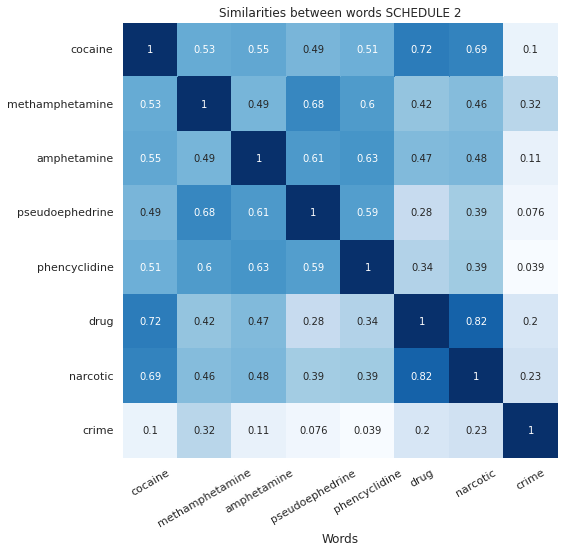

In [54]:
f, ax=plt.subplots(1, 1, figsize=(14,8))
cmap = plt.cm.Blues
axr = sns.heatmap(df, cmap=cmap, square=True ,annot=True, ax=ax, cbar=False)
plt.xlabel('Words')
_=plt.xticks(rotation=30)
_=plt.title("Similarities between words SCHEDULE 2")